<a href="https://colab.research.google.com/github/jieunlee-hi/Portfolio/blob/main/%EB%A6%AC%EB%B7%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 라이브러리 로드 : pandas, matplotlib.pyplot , numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [ ]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liber

In [ ]:
from matplotlib import font_manager,rc
font_path='/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)

FileNotFoundError: ignored

In [ ]:

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (15.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and dir

In [ ]:

plt.rc('font', family='NanumBarunGothic')

In [ ]:
data_path ='/content/drive/MyDrive/'
df=pd.read_excel(data_path + 'reviews.xlsx', index_col=None,dtype=str)
#df=pd.read_excel('/content/sample_data/1year_environment_issue.xlsx', header=None, index_col=None)
df.rename(columns={"cate2": "CATE", "message": "REVIEW", "score":"SCORE", "created_at":"Date"}, inplace=True)
df.tail()

,user_name,user_id,user_grade,brand_user_grade,product_name,product_code,CATE,REVIEW,SCORE,Date
8958,hyde****,NaN,비회원,미확인,a2 플래티넘® 분유 2단계 900g 3개입,1000000425,a2 플래티넘 2단계,배송도 빠르고 아기가 잘 먹어요,5,2023-02-06 08:38:03 +0900
8959,i_ca****,NaN,비회원,미확인,디어키즈스틱 (60일분),1000000960,디어키즈스틱,세일해서 1+1 해서 너무 좋았어요,5,2023-02-06 08:08:04 +0900
8960,김기환,ghkssmzla,회원,FAMILY,[일반] 뉴오리진 키즈오메가3 (60캡슐),1000001105,키즈오메가3,아이가 9살인데도 다른 영양제를 맛이없단 이유로 먹질 않았어요ㅠ 근데 오리진 오메가...,5,2023-02-07 07:12:00 +0900
8961,최경주,ckj321,회원,[유료]Mom&Baby Club,a2 플래티넘® 분유 2단계 900g,1000000236,a2 플래티넘 2단계,믿고먹는 A2!! 항상 잘먹이고 있어요!!,5,2023-02-07 09:02:49 +0900
8962,최경주,ckj321,회원,[유료]Mom&Baby Club,a2 플래티넘® 분유 2단계 900g,1000000236,a2 플래티넘 2단계,A2분유 우리아이에게 열심히 먹이고있습니다,5,2023-02-07 09:03:17 +0900


In [ ]:
#결측치 확인인
df.isna().sum()

user_name              0
user_id             1582
user_grade             0
brand_user_grade       0
product_name           1
product_code           0
CATE                   4
REVIEW                 3
SCORE                  0
Date                   0
dtype: int64

In [ ]:
df.shape

(8963, 10)

In [ ]:
# 리뷰가 결측치인 컬럼 삭제
df=df.dropna(subset =['REVIEW'])

df.shape


(8960, 10)

In [ ]:
#결측치 확인인
df.isna().sum()

user_name              0
user_id             1581
user_grade             0
brand_user_grade       0
product_name           1
product_code           0
CATE                   4
REVIEW                 0
SCORE                  0
Date                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8960 entries, 0 to 8962
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         8960 non-null   object
 1   user_id           7379 non-null   object
 2   user_grade        8960 non-null   object
 3   brand_user_grade  8960 non-null   object
 4   product_name      8959 non-null   object
 5   product_code      8960 non-null   object
 6   CATE              8956 non-null   object
 7   REVIEW            8960 non-null   object
 8   SCORE             8960 non-null   object
 9   Date              8960 non-null   object
dtypes: object(10)
memory usage: 770.0+ KB


In [ ]:
#a2만
df1=df[df['CATE'].str.contains('a2', na=True)]

In [ ]:
df2=df[df['CATE'].str.contains('이너플로라', na=True)]

In [ ]:
df2

,user_name,user_id,user_grade,brand_user_grade,product_name,product_code,CATE,REVIEW,SCORE,Date
6,차주영,jaycha,회원,미확인,이너플로라 여성질유산균 (40일분),1000000455,이너플로라,선물드리면 다들 너무 좋아하세요,5,2021-12-30 21:06:38 +0900
14,임병수,dalong209,회원,미확인,이너플로라 여성질유산균 (60일분),1000000048,이너플로라,효과좋아서 주변분들께 선물도 드리고 재구매하고있어요,5,2021-12-30 13:04:04 +0900
77,정인애,inaechung,회원,미확인,이너플로라 여성질유산균 (60일분),1000000048,이너플로라,"내돈내산 6개월째 ! 다른제품 먹어봤는데, 저한테는 진짜 효과가 없어서 (심지어 ...",5,2021-12-27 18:08:44 +0900
78,김선영,sunyk,회원,미확인,이너플로라 여성질유산균 (60일분),1000000048,이너플로라,이너플로라 꾸준히 먹는 아이템 중 1등이에요! 제가먹어보고 좋으니 지인분들한테도 추...,5,2021-12-27 18:08:23 +0900
81,정인애,inaechung,회원,미확인,이너플로라 여성질유산균 (60일분),1000000048,이너플로라,제가 먹고 있는 영양제 비교해봤는데 이너플로라 진짜 작아요 목에 걸리는게 하나도 없어요,5,2021-12-27 17:54:39 +0900
...,...,...,...,...,...,...,...,...,...,...
8950,김지연,wldusk77,회원,FAMILY,이너플로라 여성질유산균 (60일분),1000000048,이너플로라,할인하길래 구매했어요ㅎㅎ 늘 먹던 제품이라 안심하고 계속 복용 중인데 공홈은 처음 ...,5,2023-02-06 22:51:21 +0900
8951,bitn****,NaN,비회원,미확인,이너플로라 여성질유산균 (30일분),1000001122,이너플로라,구매전에 리뷰 꼼꼼히 읽어보고 구매했어요면역력 조금만 떨어지면 질염이 자꾸 생겨서 ...,5,2023-02-06 18:53:01 +0900
8952,lees****,NaN,비회원,미확인,이너플로라 여성질유산균 (60일분),1000000048,이너플로라,매번 시키고있어요빠른배송감사합니다,5,2023-02-06 13:33:04 +0900
8953,soso****,NaN,비회원,미확인,[시크릿] 이너플로라 (30일분),1000001131,이너플로라,유통기한은 짧지만 저렴하게 잘샀어요~,5,2023-02-06 12:48:06 +0900


In [ ]:
df['REVIEWs'] = df['REVIEW'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z0-9]","")

In [ ]:
df2['REVIEWs'] = df2['REVIEW'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z0-9]","")

In [ ]:
df['Date']

날짜컬럼변경

In [ ]:
df['DateTime'] = pd.to_datetime(df['Date'])
df['DateTime'].dt.year
df['DateTime'].dt.month
df['DateTime'].dt.day

0       31
1       31
2       31
3       30
4       30
        ..
8958     6
8959     6
8960     7
8961     7
8962     7
Name: DateTime, Length: 8960, dtype: int64

In [ ]:
df['DateTime'] = pd.to_datetime(df['Date'])
df['DateTime'] =df['DateTime'].dt.date
df['DateTime']

0       2021-12-31
1       2021-12-31
2       2021-12-31
3       2021-12-30
4       2021-12-30
           ...    
8958    2023-02-06
8959    2023-02-06
8960    2023-02-07
8961    2023-02-07
8962    2023-02-07
Name: DateTime, Length: 8960, dtype: object

In [ ]:
df['DateTime'] = pd.to_datetime(df['Date'])
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month

df.head()

,user_name,user_id,user_grade,brand_user_grade,product_name,product_code,CATE,REVIEW,SCORE,Date,REVIEWs,DateTime,Year,Month
0,박종훈,dkzmepdlwl,회원,미확인,a2 플래티넘® 분유(A2 단백질) 1단계 400g,1000000476,a2 플래티넘 1단계,둘째도 A2 시작합니다. 첫째처럼 잘맞았으면 좋겠네요,5,2021-12-31 07:59:04 +0900,둘째도A2시작합니다첫째처럼잘맞았으면좋겠네요,2021-12-31 07:59:04+09:00,2021,12
1,이영옥,yy6369,회원,미확인,에스트리션 백수오 더블 (30일분),1000000469,에스트리션 백수오더블,뼈건강에도 도움이 된다해서 열심히 챙겨먹고 있어요,5,2021-12-31 00:23:08 +0900,뼈건강에도도움이된다해서열심히챙겨먹고있어요,2021-12-31 00:23:08+09:00,2021,12
2,이영옥,yy6369,회원,미확인,에스트리션 백수오 더블 (30일분),1000000469,에스트리션 백수오더블,맛도좋고 건강해지는 느낌입니다,5,2021-12-31 00:21:31 +0900,맛도좋고건강해지는느낌입니다,2021-12-31 00:21:31+09:00,2021,12
3,이지현,jihyun.lee,회원,미확인,[딜리버리] 뉴오리진 수제 그래놀라 바(초콜릿),1000000701,Granola,정말 건강하게 맛있어요!! 아침마다 하나씩 들고 나가서 아침 대용으로 든든하게 좋아요!!,5,2021-12-30 22:24:07 +0900,정말건강하게맛있어요아침마다하나씩들고나가서아침대용으로든든하게좋아요,2021-12-30 22:24:07+09:00,2021,12
4,이지현,jihyun.lee,회원,미확인,[딜리버리] [포장] 파운드 기프트 박스,1000000798,Dessert,크리스마스 선물로 지인들에게 보내기 좋았어요!! 파운드 케이크 너무 맛있고 촉촉해요...,5,2021-12-30 22:21:08 +0900,크리스마스선물로지인들에게보내기좋았어요파운드케이크너무맛있고촉촉해요치즈파운드케이크는치즈...,2021-12-30 22:21:08+09:00,2021,12


In [ ]:
#데이터형확인
df.dtypes

user_name                                          object
user_id                                            object
user_grade                                         object
brand_user_grade                                   object
product_name                                       object
product_code                                       object
CATE                                               object
REVIEW                                             object
SCORE                                              object
Date                                               object
REVIEWs                                            object
DateTime            datetime64[ns, pytz.FixedOffset(540)]
Year                                                int64
Month                                               int64
dtype: object

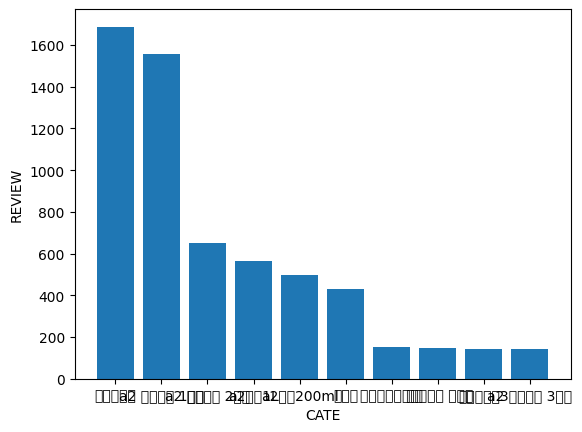

In [ ]:
#월별 리뷰뷰 갯수 확인 및 시각화
df1=df.groupby('CATE')['REVIEW'].count()
#df1=df.groupby('Month')['REVIEW'].count()

df1=pd.DataFrame({'count':df1})

df1=df1.sort_values('count',ascending=False).head(10)
df1.reset_index(inplace=True)

ax = plt.subplot()
plt.bar(range(len(df1)),
        df1["count"])
ax.set_xticks(range(len(df1)))
ax.set_xticklabels(df1.CATE)
plt.xlabel("CATE")
plt.ylabel("REVIEW")
plt.show()

In [ ]:
#월별 리뷰뷰 갯수 확인 및 시각화
df1=df.groupby('CATE')['REVIEW'].count()
#df1=df.groupby('Month')['REVIEW'].count()

df1=pd.DataFrame({'count':df1})

df1=df1.sort_values('count',ascending=False).head(10)
df1.reset_index(inplace=True)
df1


,CATE,count
0,이너플로라,1688
1,a2 플래티넘 1단계,1558
2,a2 플래티넘 2단계,649
3,a2우유1L,565
4,a2우유200ml,496
5,프로틴,431
6,에스트리션 퓨어,153
7,에스트리션 올인원,149
8,비건오메가3,144
9,a2 플래티넘 3단계,144


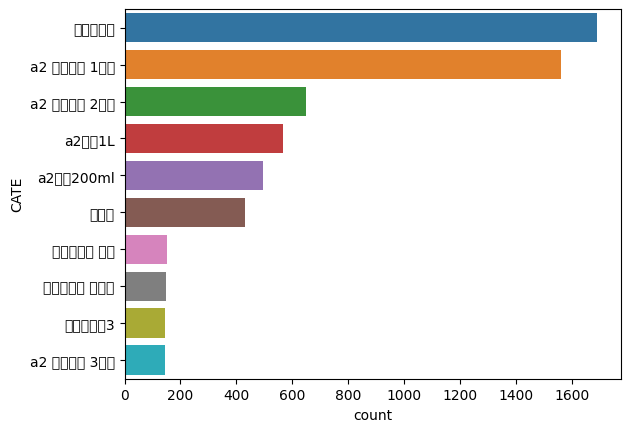

In [ ]:
sns.barplot(data=df1, x="count", y="CATE")
plt.show()

In [ ]:
df1['CATE']

KeyError: ignored

In [ ]:
sns.c

In [ ]:
df.head()

,user_name,user_id,user_grade,brand_user_grade,product_name,product_code,CATE,REVIEW,SCORE,Date,REVIEWs,DateTime,Year,Month
0,박종훈,dkzmepdlwl,회원,미확인,a2 플래티넘® 분유(A2 단백질) 1단계 400g,1000000476,a2 플래티넘 1단계,둘째도 A2 시작합니다. 첫째처럼 잘맞았으면 좋겠네요,5,2021-12-31 07:59:04 +0900,둘째도A2시작합니다첫째처럼잘맞았으면좋겠네요,2021-12-31 07:59:04+09:00,2021,12
1,이영옥,yy6369,회원,미확인,에스트리션 백수오 더블 (30일분),1000000469,에스트리션 백수오더블,뼈건강에도 도움이 된다해서 열심히 챙겨먹고 있어요,5,2021-12-31 00:23:08 +0900,뼈건강에도도움이된다해서열심히챙겨먹고있어요,2021-12-31 00:23:08+09:00,2021,12
2,이영옥,yy6369,회원,미확인,에스트리션 백수오 더블 (30일분),1000000469,에스트리션 백수오더블,맛도좋고 건강해지는 느낌입니다,5,2021-12-31 00:21:31 +0900,맛도좋고건강해지는느낌입니다,2021-12-31 00:21:31+09:00,2021,12
3,이지현,jihyun.lee,회원,미확인,[딜리버리] 뉴오리진 수제 그래놀라 바(초콜릿),1000000701,Granola,정말 건강하게 맛있어요!! 아침마다 하나씩 들고 나가서 아침 대용으로 든든하게 좋아요!!,5,2021-12-30 22:24:07 +0900,정말건강하게맛있어요아침마다하나씩들고나가서아침대용으로든든하게좋아요,2021-12-30 22:24:07+09:00,2021,12
4,이지현,jihyun.lee,회원,미확인,[딜리버리] [포장] 파운드 기프트 박스,1000000798,Dessert,크리스마스 선물로 지인들에게 보내기 좋았어요!! 파운드 케이크 너무 맛있고 촉촉해요...,5,2021-12-30 22:21:08 +0900,크리스마스선물로지인들에게보내기좋았어요파운드케이크너무맛있고촉촉해요치즈파운드케이크는치즈...,2021-12-30 22:21:08+09:00,2021,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8958,hyde****,NaN,비회원,미확인,a2 플래티넘® 분유 2단계 900g 3개입,1000000425,a2 플래티넘 2단계,배송도 빠르고 아기가 잘 먹어요,5,2023-02-06 08:38:03 +0900,배송도빠르고아기가잘먹어요,2023-02-06 08:38:03+09:00,2023,2
8959,i_ca****,NaN,비회원,미확인,디어키즈스틱 (60일분),1000000960,디어키즈스틱,세일해서 1+1 해서 너무 좋았어요,5,2023-02-06 08:08:04 +0900,세일해서11해서너무좋았어요,2023-02-06 08:08:04+09:00,2023,2
8960,김기환,ghkssmzla,회원,FAMILY,[일반] 뉴오리진 키즈오메가3 (60캡슐),1000001105,키즈오메가3,아이가 9살인데도 다른 영양제를 맛이없단 이유로 먹질 않았어요ㅠ 근데 오리진 오메가...,5,2023-02-07 07:12:00 +0900,아이가9살인데도다른영양제를맛이없단이유로먹질않았어요ㅠ근데오리진오메가3는정말맛있다고잘먹...,2023-02-07 07:12:00+09:00,2023,2
8961,최경주,ckj321,회원,[유료]Mom&Baby Club,a2 플래티넘® 분유 2단계 900g,1000000236,a2 플래티넘 2단계,믿고먹는 A2!! 항상 잘먹이고 있어요!!,5,2023-02-07 09:02:49 +0900,믿고먹는A2항상잘먹이고있어요,2023-02-07 09:02:49+09:00,2023,2


In [ ]:
data_sort=df.groupby('CATE')['REVIEW'].count()


In [ ]:
df1=df.groupby('CATE')['REVIEW'].count().sort_values('count',ascending=False).head(5)
sns.countplot(x = df1['CATE'])


ValueError: ignored

In [ ]:
#품목별 리뷰갯수 시각화
import matplotlib.pyplot as plt
import seaborn as sns
#카테고리별 데이터의 양 확인->countplot
#barplot 은 카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 기본적인 바 차트를 생성한다. 평균은 막대의 높이로, 편차는 에러바(error bar)로 표시한다.
sns.barplot(x="CATE", y="count",data=df1)
plt.title("품목별 데이터 갯수의 barplot")
#범례표시
#plt.legend()
plt.show()


ValueError: ignored

형태소 분석


한글 형태소 분석기 konlpy 설치


In [ ]:
pip install konlpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 40.4 MB/s eta 0:00:00


Okt 함수를 이용해 형태소 분석  최다빈도 단어 TOP 5 형태소분석

In [ ]:
from konlpy.tag import Okt
from collections import Counter
REVIEW=df['REVIEWs'].to_list()

# Okt 함수를 이용해 형태소 분석
okt = Okt()
REVIEW_data=[]
extend = REVIEW_data.extend
line =[]
for num in REVIEW:
  line = okt.pos(num)
  n_adj =[]
  # 명사 또는 형용사인 단어만 n_adj에 넣어주기
  for word, tag in line:
      if tag in ['Noun','Adjective']:
          n_adj.append(word)

  #제외할 단어 추가
  stop_words = "  없고 앞 습 구매 제품 좋은  조금  지금 피부   똥 햇 있길 원래 작고  다행 못 저렴하게잘  번 년 벌써 평소 예전 좀더  라가 작아 게 쟁 사은 제일 차이   얼마 냉이 사서   테 를 예정 려고 개선 작은 다른 리터 좋 좋아 있어서 없는 다만 후기 저렴한 고생 이제 개 오리진 뉴 변도 에이 없어서 역시 고민 투 최고 미리 응 엄마 걸 밀크 마음 애 중 맘 같아서 하루 다시 기한 빠른 크기기 복용 바로 도움 구 여성 분유 질 유산균 달 캡슐 정도 한번 편해요 편하고 꼭 있습니다 용 좋겠네요 처음 통 시작 한번 염 위해 좋겠어요 자주 맛있네요 집 다가 분 없어요 무 하나 배 금방 문해 일단 좋은데 기대 목 아주 섭취 같아 저 매번 매일 몸 알 효과 확실히 상품 우유 안 너 먹기 아기 애기 우리 로 주문 쭉 아가 빠르고 만족합니다  입니다 보고 플로 맛 아이 꾸준히 계속 항상 추천 해 구입 좋아요 이번 좋고 도 후 때문 정말 좋네요 좋다고 제 있어요 같아요 사용 늘 좀 먹이 개월 진짜 또 좋습니다 때 단계 좋아서 느낌 거 것 생각 더 요 좀 늘 진짜 또" #추가할 때 띄어쓰기로 추가해주기
  stop_words = set(stop_words.split(' '))

  # 불용어를 제외한 단어만 남기기
  n_adj = [word for word in n_adj if not word in stop_words]
  #print(n_adj)
  extend(n_adj)
counts = Counter(REVIEW_data)
tags = counts.most_common(5)
print(tags)

[('배송', 615), ('선물', 438), ('성분', 407), ('유통', 294), ('가격', 279)]


리뷰 최다 빈도 TOP 5 단어 데이터프레임생성


In [ ]:
all_words_df=pd.DataFrame(tags)
all_words_df.rename(columns={0: "word", 1: "count"}, inplace=True)
most=all_words_df.sort_values("count",ascending=False)
most

,word,count
0,배송,615
1,선물,438
2,성분,407
3,유통,294
4,가격,279


이미지 추가(워드크라우드 모양 설정)


In [ ]:
import numpy as np
from PIL import Image

mask = Image.new("RGBA",(1000,800), (255,255,255)) #(2555,2575)는 사진 크기, (255,255,255)는 색을의미
image = Image.open('/content/drive/MyDrive/heart2.png').convert("RGBA")
x,y = image.size
mask.paste(image,(0,0,x,y),image)
mask = np.array(mask)

리뷰 최다빈도수 TOP 20 WordCloud(워드크라우드) 만들기


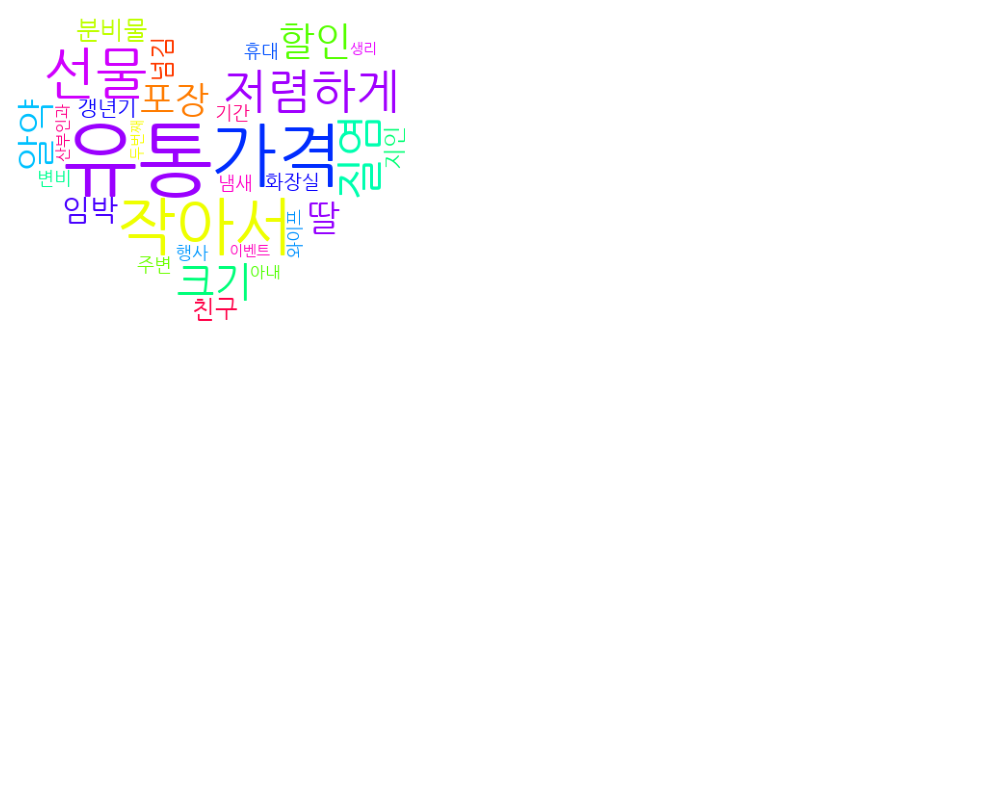

In [ ]:
from wordcloud import WordCloud
#폰트지정
font='/content/drive/MyDrive/NanumGothic.ttf'
word_cloud = WordCloud(font_path=font, background_color='white',max_font_size=83, mask=mask,colormap='hsv').generate_from_frequencies(dict(tags))

# 사이즈 설정 및 화면에 출력
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.axis('off')
#워드클라우드 사진으로 저장

plt.savefig('news.png', bbox_inches='tight')
plt.show()

{'배송': 615, '선물': 438, '성분': 407, '유통': 294, '가격': 279}


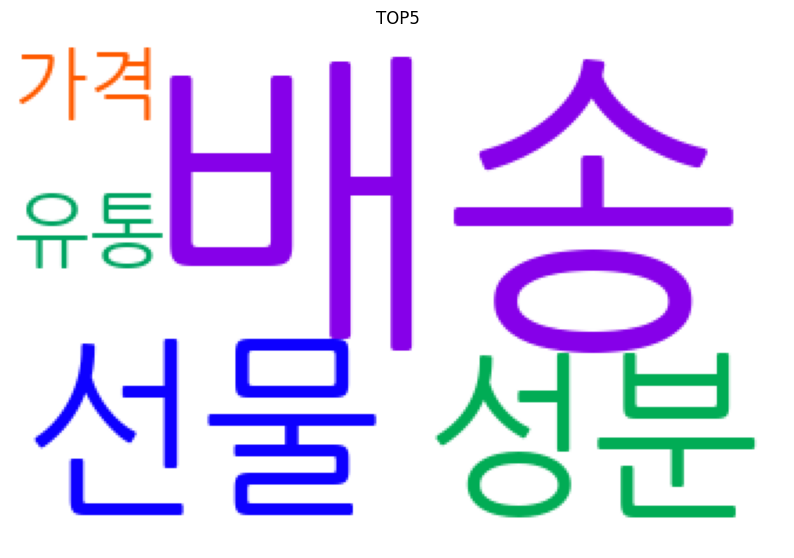

In [ ]:
from wordcloud import WordCloud

#wordCloud생성
#한글꺠지는 문제 해결하기위해 font_path 지정
font='/content/drive/MyDrive/NanumGothic.ttf'

negative_word_cloud = WordCloud(font_path=font, 
               background_color='white', width=330, height=220,max_font_size=135, colormap='prism')
print(dict(tags))
cloud = negative_word_cloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.title('TOP5')
plt.axis('off')
plt.imshow(cloud)
plt.show()